# Creating bell like shape using numpy, sympy

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sympy

Horn bell has some fixed boundary condition like below.

In [4]:
df = 300 # large end diameter
db = 16  # small end diameter
xL = 850 # length

To find adequate function that express bell diameter along with axis length, some symbols are needed.

In [7]:
a,b,c,x,p = sympy.symbols('a b c x p')

Looking from large end, bell must be monotominally decreasing.
One of such function is written by following expression.

In [8]:
f = a/(x+b)**p + c

At very beginning, bell edge has some tangent angle.

In [9]:
f1 = sympy.diff(f,x)

In [10]:
l1 = f1.subs(x,0);
l1

-a*b**(-p)*p/b

Let it be 80 degree on actual geometry.

In [11]:
# set initial df = 2*tan(-80 deg)
eq1 = sympy.Eq(l1,2*np.tan(-80/180*np.pi));
eq1

Eq(-a*b**(-p)*p/b, -11.3425636392354)

Solve this equation to eliminate constant a.

In [12]:
a1 = sympy.solve(eq1,a);
a1

[11.3425636392354*b**(p + 1)/p]

Then function is written as follows.

In [13]:
f2 = f.subs(a,a1[0]);
f2

11.3425636392354*b**(p + 1)*(b + x)**(-p)/p + c

2nd condition is larger end diameter.

In [14]:
# initial diameter condition
eq2 = sympy.Eq(f2.subs(x,0),df);
eq2

Eq(c + 11.3425636392354*b**(-p)*b**(p + 1)/p, 300)

We can eliminate constant c from this equation.

In [15]:
a2 = sympy.solve(eq2,c);
a2

[-11.3425636392354*b/p + 300.0]

Function is now below.

In [16]:
f3 = f2.subs(c,a2[0]);
f3

-11.3425636392354*b/p + 11.3425636392354*b**(p + 1)*(b + x)**(-p)/p + 300.0

3rd condition is at smaller end.

In [18]:
# 2nd diameter condition at x = xL
eq3 = sympy.Eq(f3.subs(x,xL),db);
eq3

Eq(-11.3425636392354*b/p + 11.3425636392354*b**(p + 1)*(b + 850)**(-p)/p + 300.0, 16)

Since this equation cannnot be solved analytically, we need to assume p, then solve it numerically.

In [19]:
# this is not solved mathematically.
# set p for try and error.

p0 = 1
f4 = f3.subs(p,p0).subs(x,xL) - db;
f4

11.3425636392354*b**2/(b + 850) - 11.3425636392354*b + 284.0

Numeric solution for constant b is,

In [20]:
a5 = sympy.nsolve(f4,-1);
a5

25.7983733763904

Finally we get bell function under arbitrarily defined p.

In [21]:
ff = f3.subs(p,p0).subs(b,a5);
ff

7.38030818953547 + 7549.11206661066/(x + 25.7983733763904)

Let us check boundary conditions.

In [22]:
# convert to python function
func = sympy.lambdify(x,ff)

In [23]:
# large end
func(0)

300.0000000000003

In [24]:
func(1)

289.080692036769

In [25]:
# approx tangent angle at larger end
np.arctan((func(1)-func(0))/2)*180/np.pi

-79.62065153137658

In [26]:
# smaller end
func(xL)

16.000000000000036

In [27]:
# check another diameter (bell cut position)
func(120)

59.158060518239516

Plotting shape.

In [28]:
xx = np.linspace(0,xL,xL+1)
yy = func(xx)

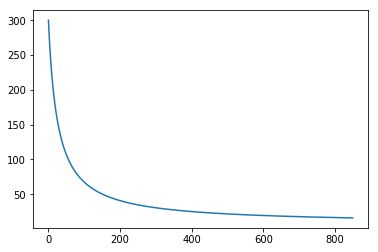

In [29]:
plt.plot(xx,yy)

### do all calculation at once

In [122]:
p0 = 0.830818 # 0.830818 gives f(120) = 65.00
ang = -80/180*np.pi
df = 300

f0 = f.subs(p,p0)
fd1 = sympy.diff(f0,x)
e1 = sympy.Eq(fd1.subs(x,0),2*np.tan(ang))
a1 = sympy.solve(e1,a)[0]
f1 = f0.subs(a,a1)
e2 = sympy.Eq(f1.subs(x,0),df)
a2 = sympy.solve(e2,c)[0]
f2 = f1.subs(c,a2)

In [123]:
xL = 850
db = 16.0

e3 = f2.subs(x,xL) - db
a3 = sympy.nsolve(e3,1)

ff = f2.subs(b,a3)
ff

3858.91961631938*(x + 21.8216750432465)**(-0.830818) + 2.08428573678191

In [124]:
func2 = sympy.lambdify(x,ff)

In [125]:
# check throat
func2(120)

65.00001571896624

Diameter at x = 120 must be near 65.0 on actual horn.

In [126]:
yy2 = func2(xx)

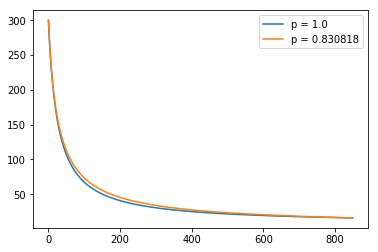

In [127]:
plt.plot(xx,yy,label = 'p = 1.0')
plt.plot(xx,yy2,label = 'p = 0.830818')
plt.legend()

In [128]:
# output data as x,y data.
import pandas as pd

In [131]:
dd = pd.DataFrame({ 'x':xx, 'y':yy2})

In [132]:
dd.head()

,x,y
0,0.0,300.000000
1,1.0,289.113541
2,2.0,279.066806
3,3.0,269.763691
4,4.0,261.122399


In [134]:
dd.to_csv('bell_20180330_xyrev.csv', index = False)